In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I start with drawing the rating chart for the World #2, American Grandmaster Fabiano Caruana

fabi = pd.read_html('https://ratings.fide.com/profile/2020009/calculations')

In [3]:
# By inspection (hit and trial lol), I found the 5th table to be the rating changes

fabi = fabi[5]

In [4]:
fabi.head()

,Period,RTNG,GMS,RAPID RTNG,RAPID GMS,BLITZ RTNG,BLITZ GMS
0,2024-Feb,2804,0,2729.0,0.0,2790.0,0.0
1,2024-Jan,2804,8,2729.0,37.0,2790.0,21.0
2,2023-Dec,2794,11,2762.0,9.0,2815.0,18.0
3,2023-Nov,2795,11,2765.0,0.0,2813.0,0.0
4,2023-Oct,2786,0,2765.0,0.0,2813.0,0.0


In [5]:
# Some data cleaning, also since candidates is classical format, I got rid of the rapid and blitz ratings.

fabi.columns

Index(['Period', 'RTNG', 'GMS', 'RAPID RTNG', 'RAPID GMS', 'BLITZ RTNG',
       'BLITZ GMS'],
      dtype='object')

In [6]:
fabi = fabi[['Period', 'RTNG']]

In [7]:
fabi.head()

,Period,RTNG
0,2024-Feb,2804
1,2024-Jan,2804
2,2023-Dec,2794
3,2023-Nov,2795
4,2023-Oct,2786


In [8]:
fabi['Period'].head()

0    2024-Feb
1    2024-Jan
2    2023-Dec
3    2023-Nov
4    2023-Oct
Name: Period, dtype: object

In [9]:
# The given time periods are by default "strings". I convert them to datetime object, just easier to work with.

from datetime import datetime

fabi['Period'] = pd.to_datetime(fabi['Period'],format='%Y-%b')

In [10]:
fabi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Period  188 non-null    datetime64[ns]
 1   RTNG    188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [11]:
# renaming the column
fabi.columns = ['Period','Rating']

In [12]:
# checking for missing data --> None found

(fabi['Period'].isnull()).sum()

0

In [13]:
(fabi['Rating'].isnull()).sum()

0

In [14]:
fabi.head()

,Period,Rating
0,2024-02-01,2804
1,2024-01-01,2804
2,2023-12-01,2794
3,2023-11-01,2795
4,2023-10-01,2786


<Axes: xlabel='Period', ylabel='Rating'>

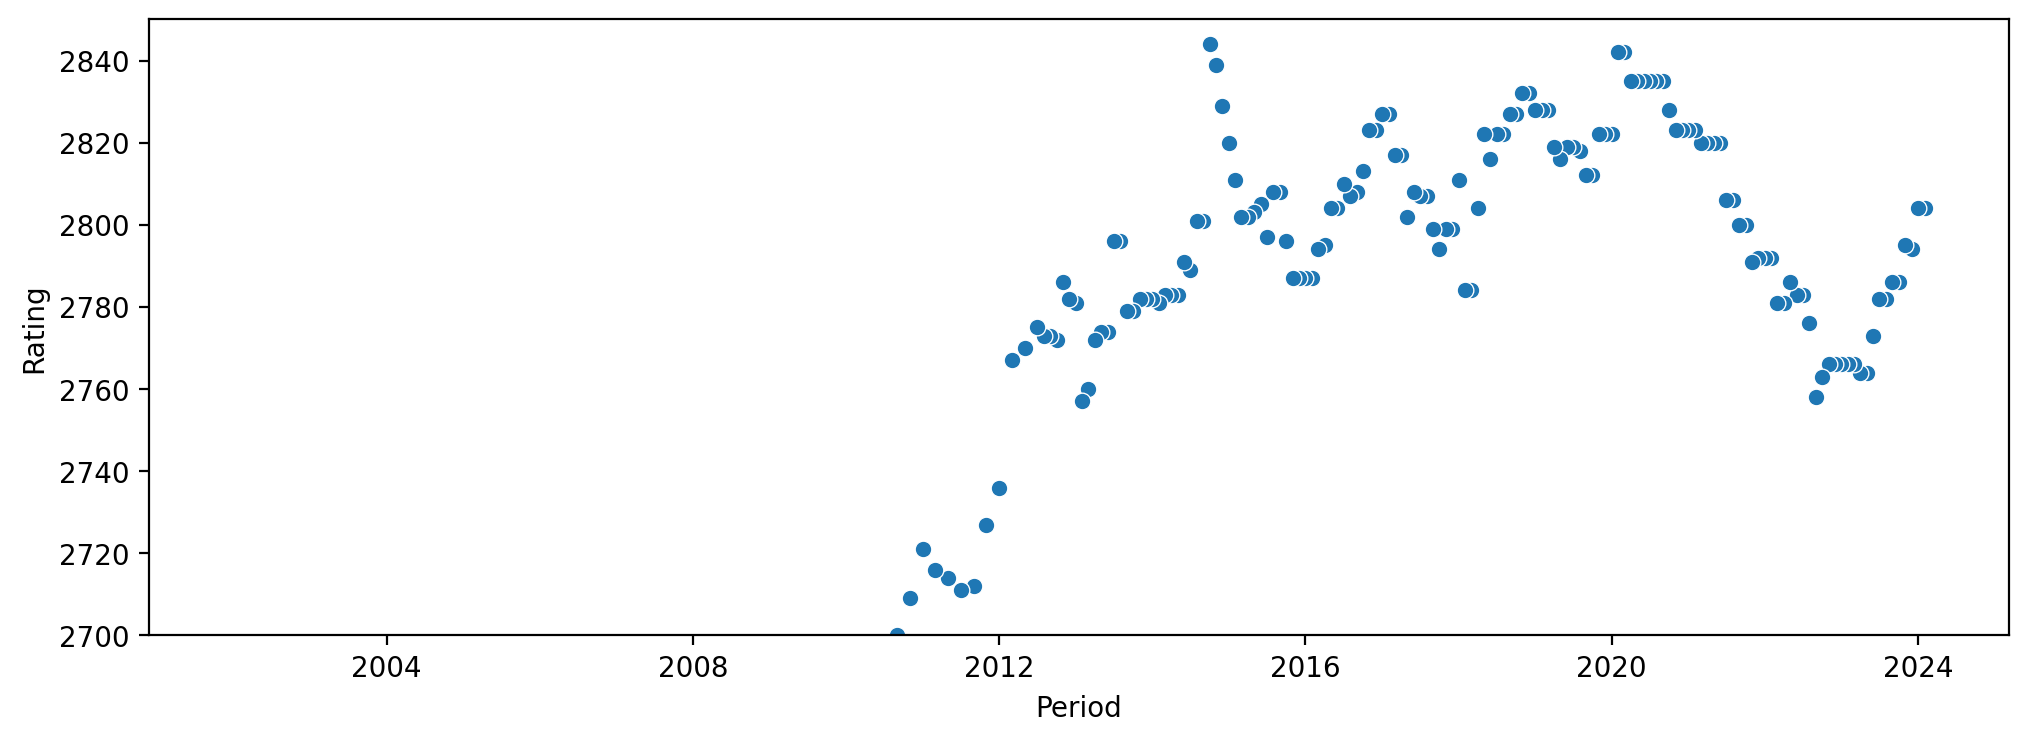

In [15]:
# Visualizing the rating chart over time

plt.figure(figsize=(12,4),dpi=200)
plt.ylim(2700,2850)
sns.scatterplot(data=fabi,x='Period',y='Rating')

<Axes: xlabel='Period', ylabel='Rating'>

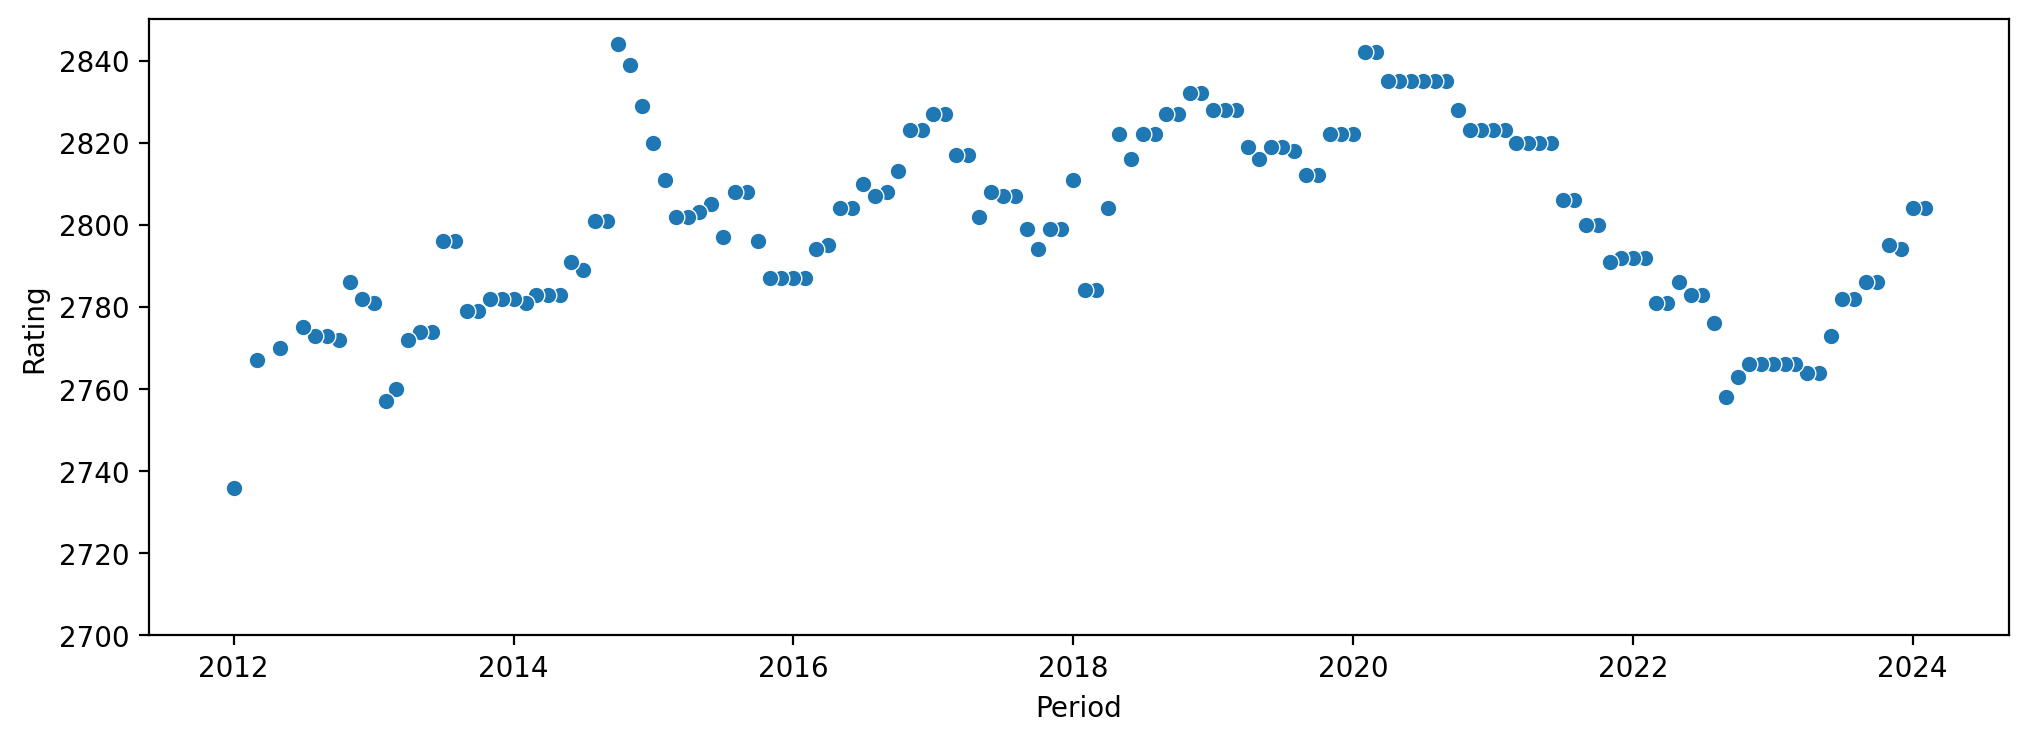

In [16]:
# Slicing the timeframe from 2012 onwards.

plt.figure(figsize=(12,4),dpi=200)
plt.ylim(2700,2850)
sns.scatterplot(data=fabi[fabi['Period'] >= pd.to_datetime('2012-01-01 00:00:00')],x='Period',y='Rating')

### We can see that since early 2023, Fabiano has been playing excellent chess! What else to expect, he was qualifying to candidates in 5 different ways.

![](https://pbs.twimg.com/media/GBzwh_lXAAEsLoU?format=jpg&name=small)